In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [9]:
# Study data files 
csv_file = Path('heart_2022_no_nans.csv')

# Read the mouse data and the study results
hd_data_df = pd.read_csv(csv_file)

In [10]:
hd_data_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [11]:
hd_data_df.count()

State                        246022
Sex                          246022
GeneralHealth                246022
PhysicalHealthDays           246022
MentalHealthDays             246022
LastCheckupTime              246022
PhysicalActivities           246022
SleepHours                   246022
RemovedTeeth                 246022
HadHeartAttack               246022
HadAngina                    246022
HadStroke                    246022
HadAsthma                    246022
HadSkinCancer                246022
HadCOPD                      246022
HadDepressiveDisorder        246022
HadKidneyDisease             246022
HadArthritis                 246022
HadDiabetes                  246022
DeafOrHardOfHearing          246022
BlindOrVisionDifficulty      246022
DifficultyConcentrating      246022
DifficultyWalking            246022
DifficultyDressingBathing    246022
DifficultyErrands            246022
SmokerStatus                 246022
ECigaretteUsage              246022
ChestScan                   

In [12]:
new_df = hd_data_df[['Sex','GeneralHealth','PhysicalActivities','SleepHours', 'HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD', 'HadDiabetes','SmokerStatus',
                      'DifficultyWalking', 'AgeCategory','RaceEthnicityCategory','BMI', 'AlcoholDrinkers', 'HadKidneyDisease' ]]
new_df.head()

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDiabetes,SmokerStatus,DifficultyWalking,AgeCategory,RaceEthnicityCategory,BMI,AlcoholDrinkers,HadKidneyDisease
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No


In [13]:
new_df.count()

Sex                      246022
GeneralHealth            246022
PhysicalActivities       246022
SleepHours               246022
HadHeartAttack           246022
HadAngina                246022
HadStroke                246022
HadAsthma                246022
HadSkinCancer            246022
HadCOPD                  246022
HadDiabetes              246022
SmokerStatus             246022
DifficultyWalking        246022
AgeCategory              246022
RaceEthnicityCategory    246022
BMI                      246022
AlcoholDrinkers          246022
HadKidneyDisease         246022
dtype: int64

In [14]:
total_columns = new_df.shape
total_columns

(246022, 18)

In [15]:
columns = {'GeneralHealth':'Health','PhysicalActivities':'PA', 'SleepHours':'Sleep','HadHeartAttack':'Heart Attack', 
           'HadAngina':'Angina', 'HadStroke':'Stroke','HadAsthma':'Asthma','HadSkinCancer':'Skin Cancer','HadCOPD':'COPD',
           'HadDiabetes':'Diabetes','SmokerStatus':'Smoker','DifficultyWalking':'Difficulty Walking',
           'AgeCategory':'Age','RaceEthnicityCategory':'Race','AlcoholDrinkers':'Alcohol','HadKidneyDisease':'Kidney Disease'
           }
renamed_data_df = new_df.rename(columns=columns)
renamed_data_df.head()

,Sex,Health,PA,Sleep,Heart Attack,Angina,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No


In [16]:
renamed_data_df['HD'] = np.where((renamed_data_df['Angina'] == 'Yes') | (renamed_data_df['Heart Attack'] == 'Yes'), 'Yes', 'No')
renamed_data_df.head()

,Sex,Health,PA,Sleep,Heart Attack,Angina,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No,No
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No,No


In [17]:
filtered_data_df = renamed_data_df.drop(columns=['Angina', 'Heart Attack'])
filtered_data_df.head()

,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,Female,Very good,Yes,9.0,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No,No
3,Female,Fair,Yes,9.0,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No,No


In [18]:
filtered_data_df = filtered_data_df[filtered_data_df.columns].replace({'Never smoked':'No', 'Former smoker':'Yes', 'Current smoker - now smokes every day':'Yes', 'Current smoker - now smokes some days':'Yes'})
filtered_data_df['Smoker'].value_counts()

Smoker
No     147737
Yes     98285
Name: count, dtype: int64

In [19]:
filtered_data_df = filtered_data_df[filtered_data_df.columns].replace({'No, pre-diabetes or borderline diabetes':'No','Yes, but only during pregnancy (female)':'Yes' })
filtered_data_df['Diabetes'].value_counts()

Diabetes
No     210226
Yes     35796
Name: count, dtype: int64

In [20]:
filtered_data_df['Age'] = filtered_data_df['Age'].str.replace('Age', '')
filtered_data_df['Age'] = filtered_data_df['Age'].str.replace(' to ', '-')
filtered_data_df['Age'] = filtered_data_df['Age'].str.replace(' or older', '+')
filtered_data_df['Race'] = filtered_data_df['Race'].str.replace(', Non-Hispanic', '')

In [21]:
YN_columns_to_convert = ['PA','Stroke', 'Asthma','Skin Cancer','COPD','Diabetes','Difficulty Walking','Alcohol','HD','Smoker', 'Kidney Disease']
filtered_data_df[YN_columns_to_convert] = filtered_data_df[YN_columns_to_convert].replace({'Yes': 1, 'No': 0})
filtered_data_df['Health'] = filtered_data_df['Health'].replace({'Very good': 4,'Good': 3,'Excellent': 5,'Fair': 2,'Poor': 1})
filtered_data_df['Sex'] = filtered_data_df['Sex'].replace({'Female': 'F', 'Male': 'M'})
filtered_data_df.head()

,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,F,4,1,9.0,0,0,0,0,0,1,0,65-69,White only,27.99,0,0,0
1,M,4,1,6.0,0,0,0,0,1,1,0,70-74,White only,30.13,0,0,0
2,M,4,0,8.0,0,0,0,0,0,1,1,75-79,White only,31.66,1,0,0
3,F,2,1,9.0,0,0,1,0,0,0,1,80+,White only,31.32,0,0,0
4,F,3,1,5.0,0,0,0,0,0,0,0,80+,White only,33.07,0,0,0


In [22]:
filtered_data_df['BMI'] = filtered_data_df['BMI'].apply(np.ceil)
filtered_data_df['BMI'] = filtered_data_df['BMI'].astype(int)
filtered_data_df['Sleep'] = filtered_data_df['Sleep'].astype(int)
filtered_data_df.head()

,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,F,4,1,9,0,0,0,0,0,1,0,65-69,White only,28,0,0,0
1,M,4,1,6,0,0,0,0,1,1,0,70-74,White only,31,0,0,0
2,M,4,0,8,0,0,0,0,0,1,1,75-79,White only,32,1,0,0
3,F,2,1,9,0,0,1,0,0,0,1,80+,White only,32,0,0,0
4,F,3,1,5,0,0,0,0,0,0,0,80+,White only,34,0,0,0


In [23]:
original_df_size = hd_data_df.size
new_df_size = filtered_data_df.size
difference = original_df_size - new_df_size
difference_per = np.ceil((difference/original_df_size)*100)
print('Main Dataframe size =',  original_df_size, '- Cleaned Dataframe size =', new_df_size, '- Dataframe is reduced by =', 
      difference, 'elements and', difference_per, '%',)

Main Dataframe size = 9840880 - Cleaned Dataframe size = 4182374 - Dataframe is reduced by = 5658506 elements and 58.0 %


In [24]:
columns_reordered= ['Race', 'Sex', 'Age', 'Health', 'BMI', 'PA', 'Sleep', 'Smoker', 'Alcohol', 'Difficulty Walking',
                    'Kidney Disease', 'Skin Cancer','Asthma', 'COPD', 'Diabetes', 'Stroke', 'HD']
filtered_data_reordered = filtered_data_df[columns_reordered]
filtered_data_reordered.head()

,Race,Sex,Age,Health,BMI,PA,Sleep,Smoker,Alcohol,Difficulty Walking,Kidney Disease,Skin Cancer,Asthma,COPD,Diabetes,Stroke,HD
0,White only,F,65-69,4,28,1,9,1,0,0,0,0,0,0,0,0,0
1,White only,M,70-74,4,31,1,6,1,0,0,0,0,0,0,1,0,0
2,White only,M,75-79,4,32,0,8,1,1,1,0,0,0,0,0,0,0
3,White only,F,80+,2,32,1,9,0,0,1,0,1,0,0,0,0,0
4,White only,F,80+,3,34,1,5,0,0,0,0,0,0,0,0,0,0


In [25]:
filtered_data_reordered.nunique()

Race                   5
Sex                    2
Age                   13
Health                 5
BMI                   82
PA                     2
Sleep                 23
Smoker                 2
Alcohol                2
Difficulty Walking     2
Kidney Disease         2
Skin Cancer            2
Asthma                 2
COPD                   2
Diabetes               2
Stroke                 2
HD                     2
dtype: int64

In [26]:
def chi2_hd(x=''):
    contingency_table = pd.crosstab(filtered_data_reordered[x], filtered_data_reordered['HD'])

    # Display the contingency table
    print("Contingency Table:")
    print(contingency_table)

    # Perform Pearson's Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Display the results
    print("\nChi-square Statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=filtered_data_df[x].unique(), columns=filtered_data_df['HD'].unique()))

In [27]:
filtered_data_reordered['Kidney Disease'].value_counts()

Kidney Disease
0    234738
1     11284
Name: count, dtype: int64

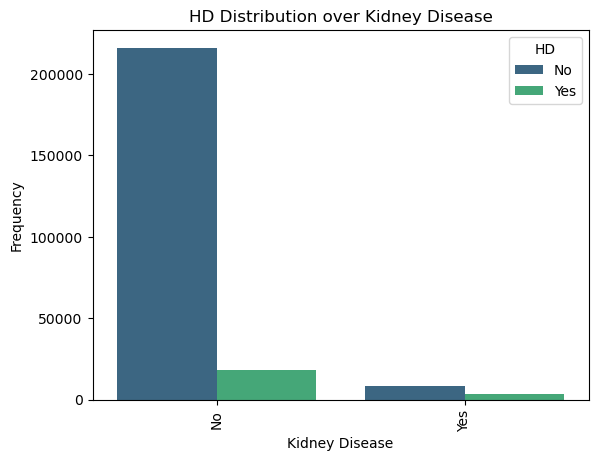

In [28]:
sns.countplot(x=filtered_data_reordered['Kidney Disease'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Kidney Disease')

# Set labels and rotate x-axis labels
plt.xlabel('Kidney Disease')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Kidney Disease'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_kidneydisease.png")

# Show the plot
plt.show()

In [29]:
chi2_hd('Kidney Disease')

Contingency Table:
HD                   0      1
Kidney Disease               
0               216275  18463
1                 8131   3153

Chi-square Statistic: 5412.538763910834
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  214113.435498  20624.564502
1   10292.564502    991.435498


In [30]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Kidney Disease and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has kidney disease who also has HD is much higher than the population who doesn't have kidney disease who has HD

In [31]:
filtered_data_reordered['Alcohol'].value_counts()

Alcohol
1    135307
0    110715
Name: count, dtype: int64

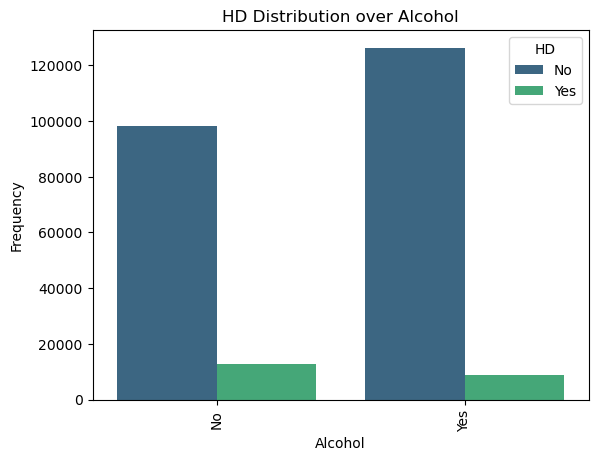

In [32]:
sns.countplot(x=filtered_data_reordered['Alcohol'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Alcohol')

# Set labels and rotate x-axis labels
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Alcohol'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_smoker.png")

# Show the plot
plt.show()

In [33]:
chi2_hd('Alcohol')

Contingency Table:
HD            0      1
Alcohol               
0         98062  12653
1        126344   8963

Chi-square Statistic: 1753.0450240873233
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  100987.351903   9727.648097
1  123418.648097  11888.351903


In [34]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Alcohol and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who doesn't have alcohol who also has HD is much higher than the population who has alcohol have COPD who has HD

In [35]:
filtered_data_reordered['Smoker'].value_counts()

Smoker
0    147737
1     98285
Name: count, dtype: int64

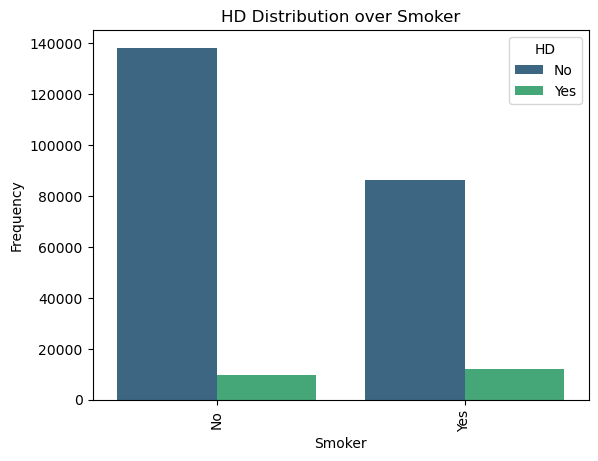

In [36]:
sns.countplot(x=filtered_data_reordered['Smoker'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Smoker')

# Set labels and rotate x-axis labels
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Smoker'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_smoker.png")

# Show the plot
plt.show()

In [37]:
chi2_hd('Smoker')

Contingency Table:
HD           0      1
Smoker               
0       138262   9475
1        86144  12141

Chi-square Statistic: 2597.2032938214106
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
1  134756.522677  12980.477323
0   89649.477323   8635.522677


In [38]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Smoking and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who smokes who also has HD is much higher than the population who doesn't smoke who has HD

In [39]:
filtered_data_reordered['Diabetes'].value_counts()

Diabetes
0    210226
1     35796
Name: count, dtype: int64

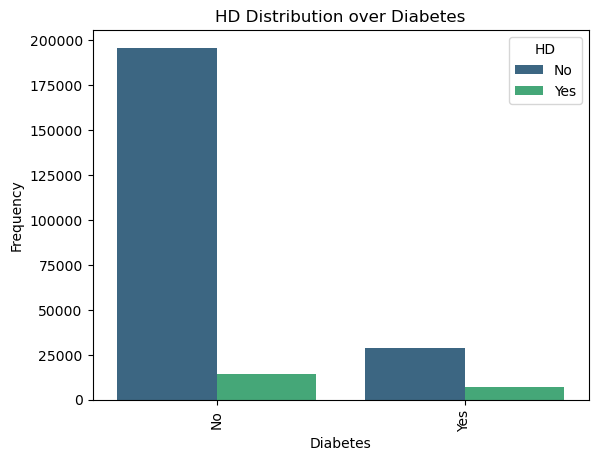

In [40]:
sns.countplot(x=filtered_data_reordered['Diabetes'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Diabetes')

# Set labels and rotate x-axis labels
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Diabetes'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_diabetes.png")

# Show the plot
plt.show()

In [41]:
chi2_hd('Diabetes')

Contingency Table:
HD             0      1
Diabetes               
0         195861  14365
1          28545   7251

Chi-square Statistic: 6875.430237755767
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
              0            1
0  191755.11034  18470.88966
1   32650.88966   3145.11034


In [42]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Diabetes and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has Diabetes who also has HD is much higher than the population who doesn't have Diabetes who has HD

In [43]:
filtered_data_reordered['Difficulty Walking'].value_counts()

Difficulty Walking
0    209952
1     36070
Name: count, dtype: int64

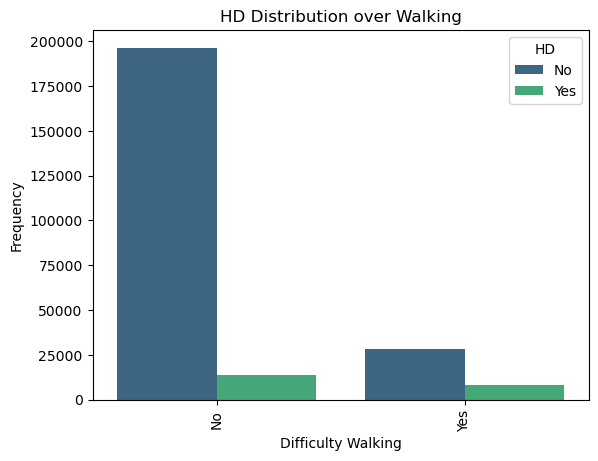

In [44]:
sns.countplot(x=filtered_data_reordered['Difficulty Walking'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Walking')

# Set labels and rotate x-axis labels
plt.xlabel('Difficulty Walking')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Difficulty Walking'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_walking.png")

# Show the plot
plt.show()

In [45]:
chi2_hd('Difficulty Walking')

Contingency Table:
HD                       0      1
Difficulty Walking               
0                   196410  13542
1                    27996   8074

Chi-square Statistic: 9749.956401858355
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  191505.184544  18446.815456
1   32900.815456   3169.184544


In [46]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Dificulty Walking and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has difficulty walking who also has HD is much higher than the population who doesn't have difficulty walking who has HD

In [47]:
filtered_data_reordered['COPD'].value_counts()

COPD
0    227028
1     18994
Name: count, dtype: int64

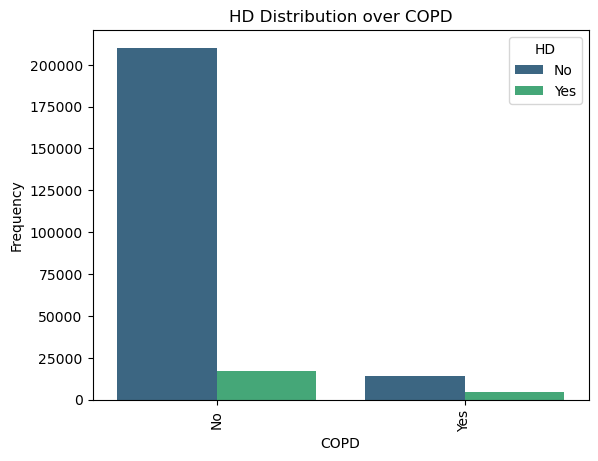

In [48]:
sns.countplot(x=filtered_data_reordered['COPD'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over COPD')

# Set labels and rotate x-axis labels
plt.xlabel('COPD')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['COPD'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')


plt.savefig("output_data/hd_COPD.png")

# Show the plot
plt.show()

In [49]:
chi2_hd('COPD')

Contingency Table:
HD         0      1
COPD               
0     210207  16821
1      14199   4795

Chi-square Statistic: 6954.986948536433
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  207080.851989  19947.148011
1   17325.148011   1668.851989


In [50]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between COPD and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has COPD who also has HD is much higher than the population who doesn't have COPD who has HD

In [51]:
filtered_data_reordered['Skin Cancer'].value_counts()

Skin Cancer
0    225001
1     21021
Name: count, dtype: int64

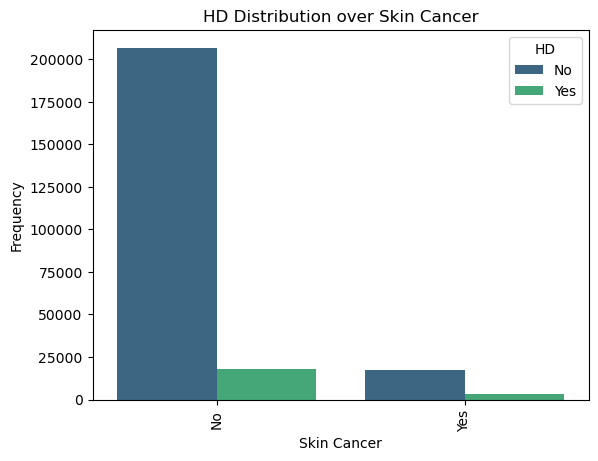

In [52]:
sns.countplot(x=filtered_data_reordered['Skin Cancer'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Skin Cancer')

# Set labels and rotate x-axis labels
plt.xlabel('Skin Cancer')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Skin Cancer'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')


plt.savefig("output_data/hd_skincancer.png")

# Show the plot
plt.show()

In [53]:
chi2_hd('Skin Cancer')

Contingency Table:
HD                0      1
Skin Cancer               
0            206796  18205
1             17610   3411

Chi-square Statistic: 1586.7140281194856
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  205231.948387  19769.051613
1   19174.051613   1846.948387


In [54]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Skin Cancer and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has Skin Cancer who also has HD is much higher than the population who doesn't have Skin Cancer who has HD

In [55]:
filtered_data_reordered['Asthma'].value_counts()

Asthma
0    209493
1     36529
Name: count, dtype: int64

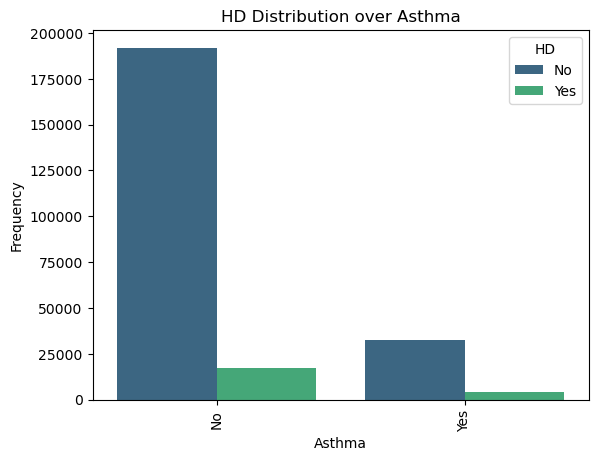

In [56]:
sns.countplot(x=filtered_data_reordered['Asthma'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Asthma')

# Set labels and rotate x-axis labels
plt.xlabel('Asthma')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Asthma'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')


plt.savefig("output_data/hd_asthma.png")

# Show the plot
plt.show()

In [57]:
chi2_hd('Asthma')

Contingency Table:
HD           0      1
Asthma               
0       192007  17486
1        32399   4130

Chi-square Statistic: 339.52198547855977
P-value: 8.109122683790465e-76
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  191086.513231  18406.486769
1   33319.486769   3209.513231


In [58]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Asthma and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has Asthma who also has HD is much higher than the population who doesn't have Asthma that has HD

In [59]:
filtered_data_reordered['PA'].value_counts()

PA
1    191318
0     54704
Name: count, dtype: int64

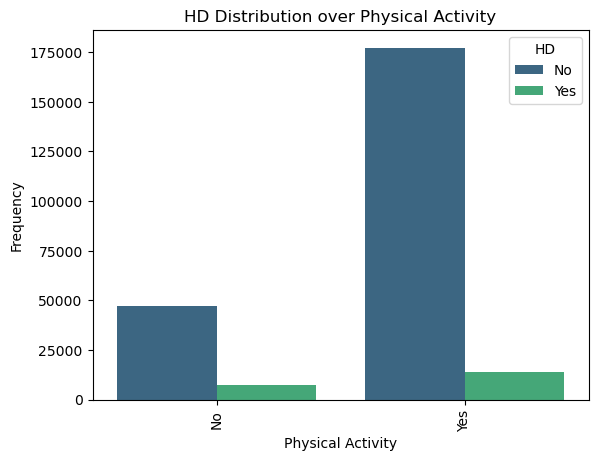

In [60]:
sns.countplot(x=filtered_data_reordered['PA'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Physical Activity')

# Set labels and rotate x-axis labels
plt.xlabel('Physical Activity')
plt.ylabel('Frequency')

plt.xticks(ticks=range(len(filtered_data_reordered['PA'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_physicalactivity.png")

# Show the plot
plt.show()

In [61]:
chi2_hd('PA')

Contingency Table:
HD       0      1
PA               
0    47121   7583
1   177285  14033

Chi-square Statistic: 2260.504611299293
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
1   49897.593809   4806.406191
0  174508.406191  16809.593809


In [62]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Physical Activity and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions of the population who are active pysically who has HD are much smaller than the population who are not active physically who has HD 

In [63]:
filtered_data_reordered['Stroke'].value_counts()

Stroke
0    235910
1     10112
Name: count, dtype: int64

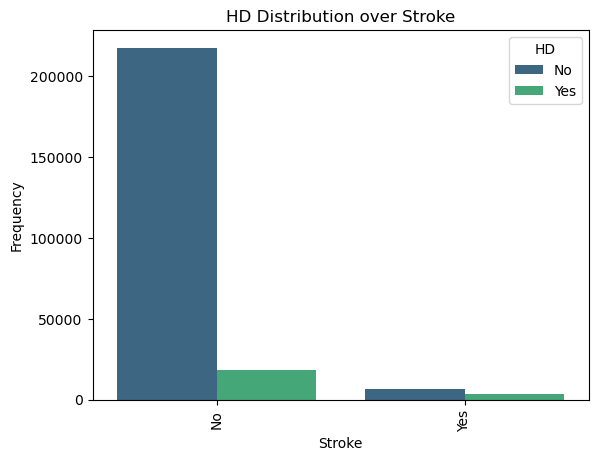

In [64]:
sns.countplot(x=filtered_data_reordered['Stroke'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Stroke')

# Set labels and rotate x-axis labels
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Stroke'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_stroke.png")

# Show the plot
plt.show()

In [65]:
chi2_hd('Stroke')

Contingency Table:
HD           0      1
Stroke               
0       217804  18106
1         6602   3510

Chi-square Statistic: 8840.473748881534
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
0  215182.461162  20727.538838
1    9223.538838    888.461162


In [66]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Stroke and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions the population who has stroke who also has HD is much higher than the population who doesn't have stroke who has HD

In [67]:
filtered_data_reordered['Race'].value_counts()

Race
White only         186336
Hispanic            22570
Black only          19330
Other race only     12205
Multiracial          5581
Name: count, dtype: int64

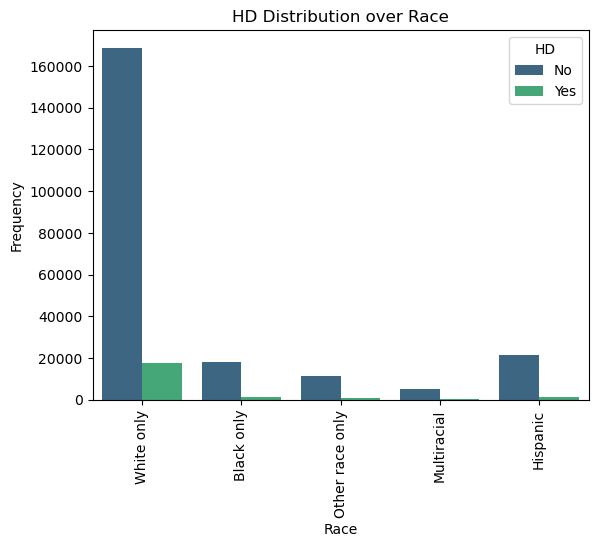

In [68]:
sns.countplot(x=filtered_data_reordered['Race'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Race')

# Set labels and rotate x-axis labels
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_race.png")

# Show the plot
plt.show()

In [69]:
chi2_hd('Race')

Contingency Table:
HD                    0      1
Race                          
Black only        17902   1428
Hispanic          21282   1288
Multiracial        5077    504
Other race only   11379    826
White only       168766  17570

Chi-square Statistic: 472.8569406186095
P-value: 4.965383243594616e-101
Degrees of Freedom: 4

Expected Frequencies:
                             0             1
White only        17631.626359   1698.373641
Black only        20586.953281   1983.046719
Other race only    5090.641837    490.358163
Multiracial       11132.643544   1072.356456
Hispanic         169964.134980  16371.865020


In [70]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Race and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# From the plot, it is hard to see which race is more susceptible to HD
# Perhaps other visualisations that looks into proportions would help us intepret this data better

In [71]:
filtered_data_reordered['Age'].value_counts()

Age
 65-69    28557
 60-64    26720
 70-74    25739
 55-59    22224
 50-54    19913
 75-79    18136
 80+      17816
 40-44    16973
 45-49    16753
 35-39    15614
 30-34    13346
 18-24    13122
 25-29    11109
Name: count, dtype: int64

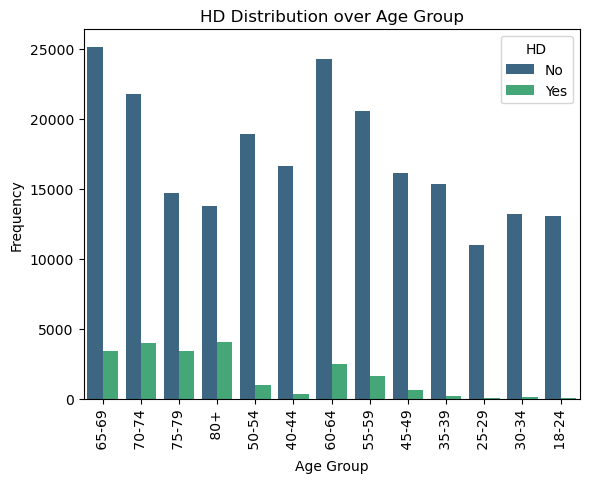

In [72]:
sns.countplot(x=filtered_data_reordered['Age'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Age Group')

# Set labels and rotate x-axis labels
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_agegroup.png")

# Show the plot
plt.show()

In [73]:
chi2_hd('Age')

Contingency Table:
HD          0     1
Age                
 18-24  13033    89
 25-29  11014    95
 30-34  13197   149
 35-39  15371   243
 40-44  16612   361
 45-49  16140   613
 50-54  18883  1030
 55-59  20571  1653
 60-64  24258  2462
 65-69  25119  3438
 70-74  21770  3969
 75-79  14701  3435
 80+    13737  4079

Chi-square Statistic: 14364.937874394453
P-value: 0.0
Degrees of Freedom: 12

Expected Frequencies:
                   0            1
 65-69  11969.074034  1152.925966
 70-74  10132.940363   976.059637
 75-79  12173.392932  1172.607068
 80+    14242.121778  1371.878222
 50-54  15481.717237  1491.282763
 40-44  15281.046890  1471.953110
 60-64  18163.402777  1749.597223
 55-59  20271.353554  1952.646446
 45-49  24372.325727  2347.674273
 35-39  26047.923121  2509.076879
 25-29  23477.518409  2261.481591
 30-34  16542.533660  1593.466340
 18-24  16250.649519  1565.350481


In [74]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Age and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# Population from 75+ appears to be have a higher prevalence for HD. The proportions of Yes to No is highest in those age groups

In [75]:
filtered_data_reordered['Sex'].value_counts()

Sex
F    127811
M    118211
Name: count, dtype: int64

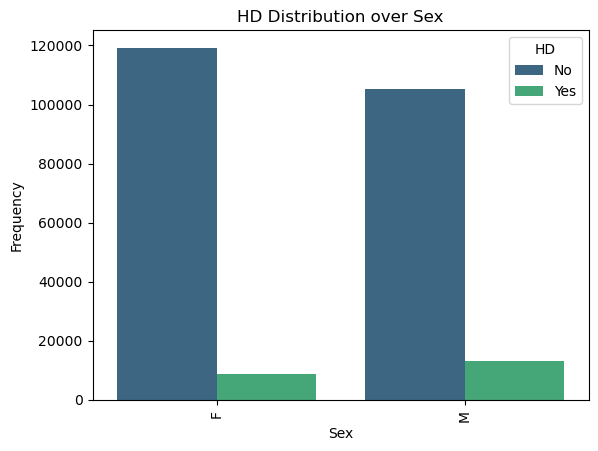

In [76]:
sns.countplot(x=filtered_data_reordered['Sex'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Sex')

# Set labels and rotate x-axis labels
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_sex.png")

# Show the plot
plt.show()

In [77]:
chi2_hd('Sex')

Contingency Table:
HD        0      1
Sex               
F    119233   8578
M    105173  13038

Chi-square Statistic: 1428.1811955752205
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
F  116581.262107  11229.737893
M  107824.737893  10386.262107


In [78]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between Sex and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# Female has the highest NO HD count, whilst male has the highest HD count
# The proportions of population whi has HD is the smallest in female compared to male

In [79]:
filtered_data_reordered['Health'].value_counts()

Health
4    86999
3    77409
5    41525
2    30659
1     9430
Name: count, dtype: int64

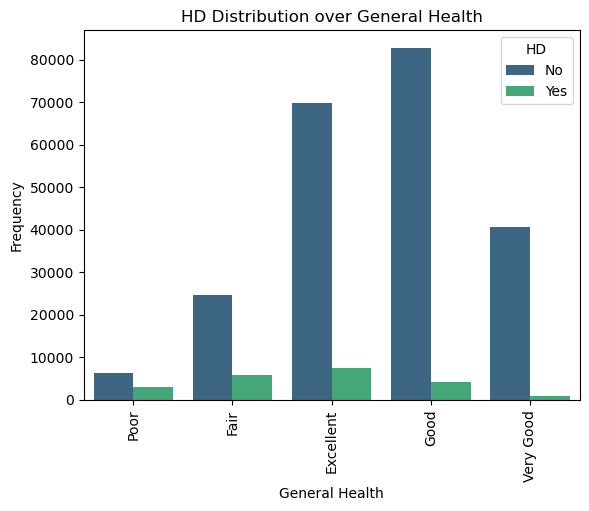

In [93]:
sns.countplot(x=filtered_data_reordered['Health'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over General Health')

# Set labels and rotate x-axis labels
plt.xlabel('General Health')
plt.ylabel('Frequency')

plt.xticks(ticks=range(len(filtered_data_reordered['Health'].unique())),labels=['Poor','Fair','Excellent','Good','Very Good'], rotation=90)

legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

plt.savefig("output_data/hd_generalhealth.png")

# Show the plot
plt.show()

In [81]:
chi2_hd('Health')

Contingency Table:
HD          0     1
Health             
1        6414  3016
2       24741  5918
3       69879  7530
4       82818  4181
5       40554   971

Chi-square Statistic: 14522.083621300375
P-value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
              0            1
4   8601.460764   828.539236
2  27965.237068  2693.762932
3  70607.685711  6801.314289
5  79355.088545  7643.911455
1  37876.527912  3648.472088


In [82]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between General Health and HD is statistically significant 
# In general, a large chi-square statistic indicates a greater discrepancy between observed and expected frequencies, which may suggest a stronger association between the variables. However, the interpretation of "large" depends on the context and the degrees of freedom.

# The proportions of populations with fair, excellent, good and very good health that has HD are small, whereas
# The population with poor health who has HD has the highest proportion

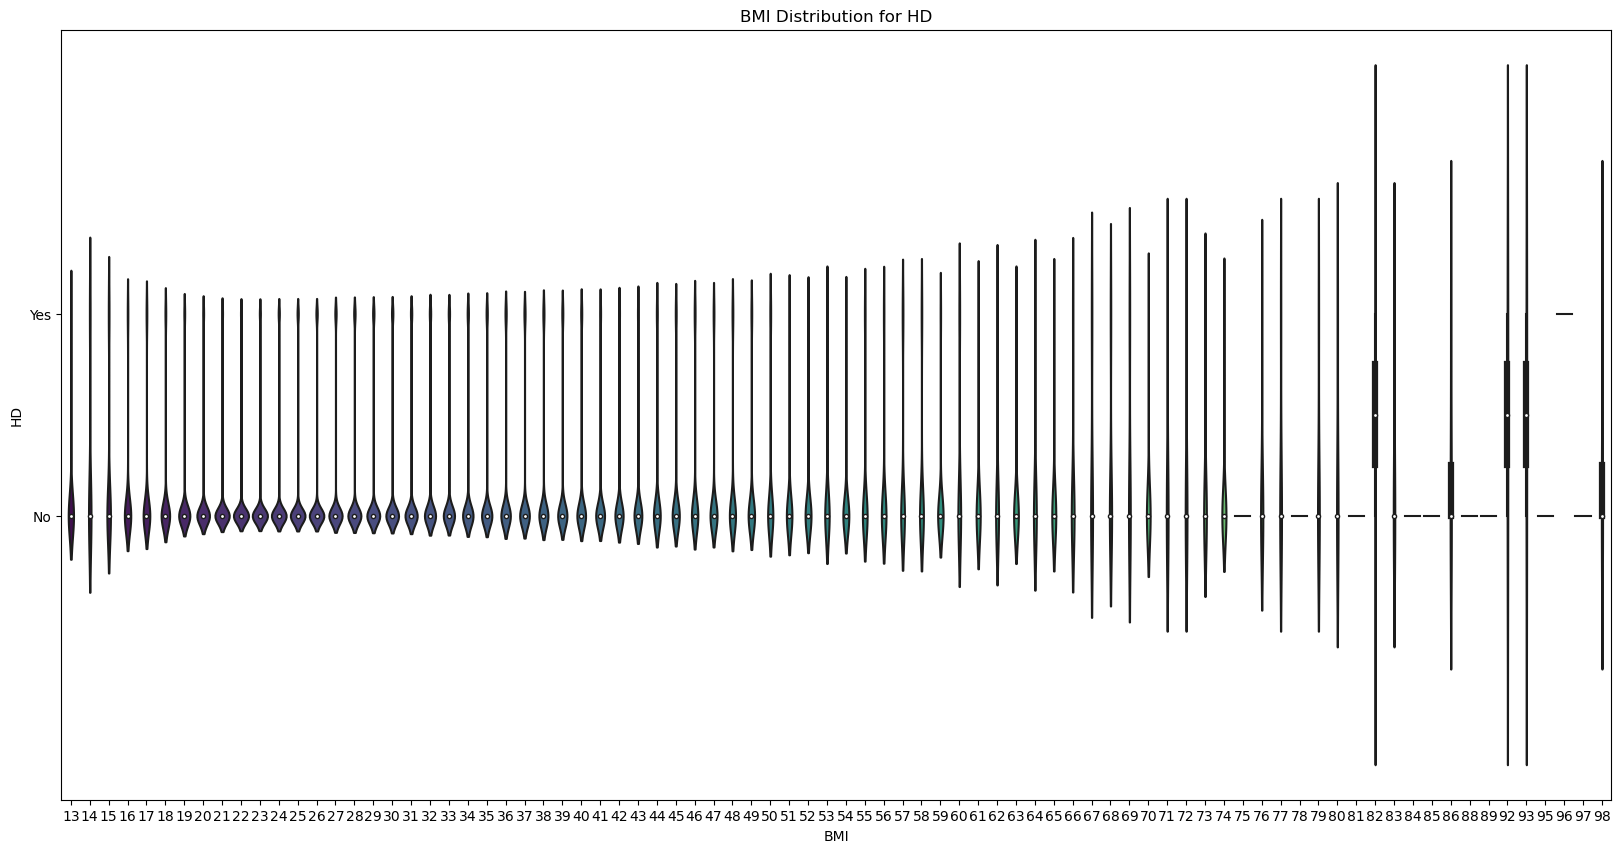

In [102]:
plt.figure(figsize=(20,10))
sns.violinplot(x='BMI', y='HD', data=filtered_data_reordered, palette='viridis', tick_labels=['No', 'Yes'])
plt.title('BMI Distribution for HD')
plt.xlabel('BMI')
plt.ylabel('HD')
plt.yticks([0, 1], ['No', 'Yes'])

plt.savefig("output_data/hd_bmi1.png")

plt.show()

In [84]:
from scipy.stats import shapiro

# Separate BMI data based on heart disease status
bmi_hd_yes = filtered_data_reordered[filtered_data_reordered['HD'] == 1]['BMI']
bmi_hd_no = filtered_data_reordered[filtered_data_reordered['HD'] == 0]['BMI']

# Perform Shapiro-Wilk test for BMI with heart disease
stat_hd_yes, p_value_hd_yes = shapiro(bmi_hd_yes)
stat_hd_no, p_value_hd_no = shapiro(bmi_hd_no)

# Display the results
print("Shapiro-Wilk Test for BMI with Heart Disease (Yes):")
print(f"Statistic: {stat_hd_yes}")
print(f"P-value: {p_value_hd_yes}")
print("")

print("Shapiro-Wilk Test for BMI with Heart Disease (No):")
print(f"Statistic: {stat_hd_no}")
print(f"P-value: {p_value_hd_no}")

Shapiro-Wilk Test for BMI with Heart Disease (Yes):
Statistic: 0.9254754185676575
P-value: 0.0

Shapiro-Wilk Test for BMI with Heart Disease (No):
Statistic: 0.9265727400779724
P-value: 0.0


c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between General Health and HD is statistically significant 

# From the violin plot:

# The population with BMI between 20-30 who does not have HD is very high (normal to overweight)
# The population with BMI below 20 who has no HD is low (mostly underweight)
# The population with BMI above 30 who has HD is low (obese)

# From the boxplot:

# In general, population with HD has higher BMI

# The weakness of the box plot is that we are not able to see the sample size clearly, hence we cannot see the proportions clearly 
# Whilst we are able to visualize this better with the violin plot

# In summary, population with normal to slighly higher BMI has a lower prevalence to HD

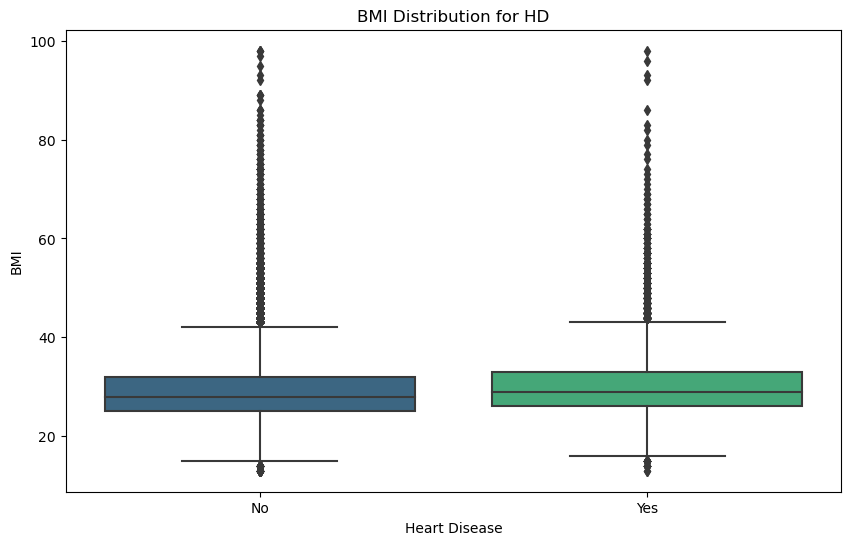

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HD', y='BMI', data=filtered_data_reordered, palette='viridis')
plt.title('BMI Distribution for HD')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.savefig("output_data/hd_bmi2.png")

plt.show()

In [86]:
# Separate BMI data based on heart disease status
bmi_hd_yes = filtered_data_reordered[filtered_data_reordered['HD'] == 1]['BMI']
bmi_hd_no = filtered_data_reordered[filtered_data_reordered['HD'] == 0]['BMI']

# Perform Shapiro-Wilk test for BMI with heart disease
stat_hd_yes, p_value_hd_yes = shapiro(bmi_hd_yes)
stat_hd_no, p_value_hd_no = shapiro(bmi_hd_no)

# Display the results
print("Shapiro-Wilk Test for BMI with Heart Disease (Yes):")
print(f"Statistic: {stat_hd_yes}")
print(f"P-value: {p_value_hd_yes}")
print("")

print("Shapiro-Wilk Test for BMI with Heart Disease (No):")
print(f"Statistic: {stat_hd_no}")
print(f"P-value: {p_value_hd_no}")

Shapiro-Wilk Test for BMI with Heart Disease (Yes):
Statistic: 0.9254754185676575
P-value: 0.0

Shapiro-Wilk Test for BMI with Heart Disease (No):
Statistic: 0.9265727400779724
P-value: 0.0


c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


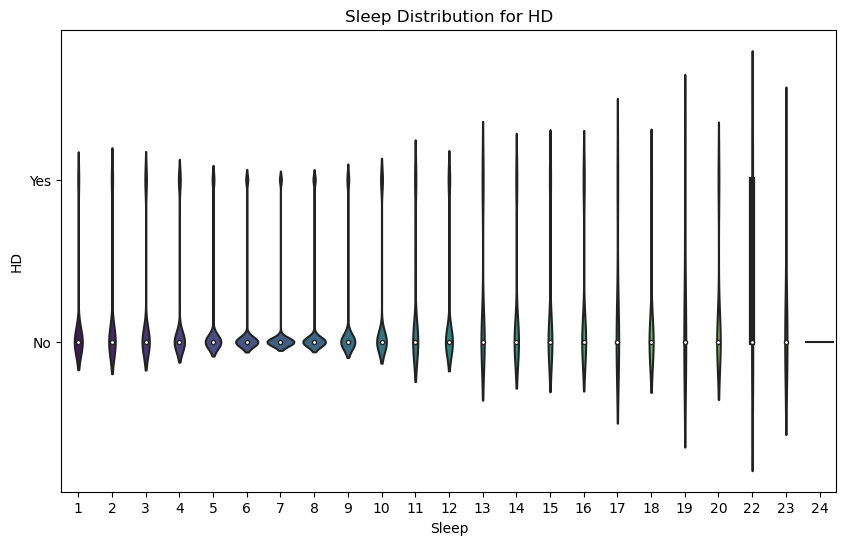

In [104]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sleep', y='HD', data=filtered_data_reordered, palette='viridis', tick_labels=['No', 'Yes'])
plt.title('Sleep Distribution for HD')
plt.xlabel('Sleep')
plt.ylabel('HD')
plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.savefig("output_data/hd_sleep1.png")

plt.show()

In [ ]:
# p<0.05 (rejects null hypothesis) indicates that the observed association between General Health and HD is statistically significant 

# From the violin plot:

# The population with sleeping time at an average between 5-9 hours daily who does not have HD is very high

# From the boxplot:

# In general, population with HD and no HD has similar sleeping times

# The weakness of the box plot is that we are not able to see the sample size clearly, hence we cannot see the proportions clearly 
# Whilst we are able to visualize this better with the violin plot

# In summary, the population of people with normal average sleeping times have lower prevalence to HD

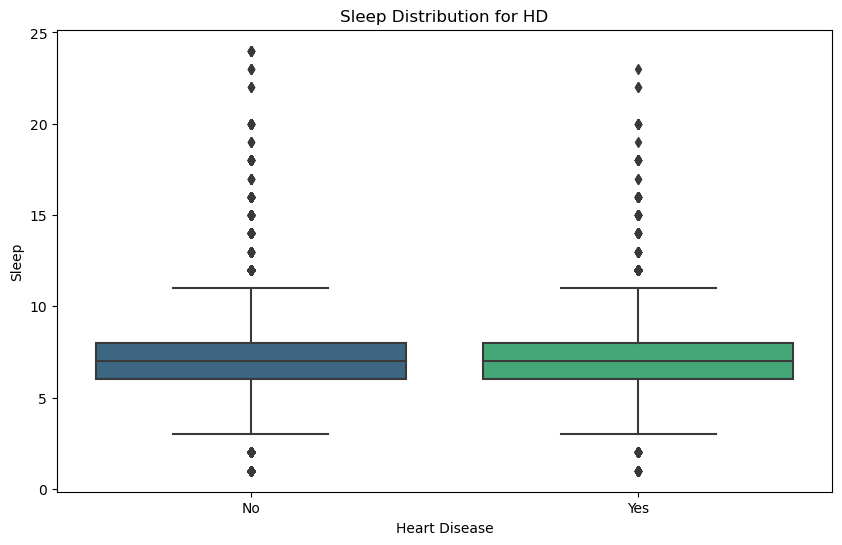

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HD', y='Sleep', data=filtered_data_reordered, palette='viridis')
plt.title('Sleep Distribution for HD')
plt.xlabel('Heart Disease')
plt.ylabel('Sleep')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.savefig("output_data/hd_sleep2.png")

plt.show()

In [89]:
# Separate Sleep data based on heart disease status
bmi_hd_yes = filtered_data_reordered[filtered_data_reordered['HD'] == 1]['BMI']
bmi_hd_no = filtered_data_reordered[filtered_data_reordered['HD'] == 0]['BMI']

# Perform Shapiro-Wilk test for Sleep with heart disease
stat_hd_yes, p_value_hd_yes = shapiro(bmi_hd_yes)
stat_hd_no, p_value_hd_no = shapiro(bmi_hd_no)

# Display the results
print("Shapiro-Wilk Test for Sleep with Heart Disease (Yes):")
print(f"Statistic: {stat_hd_yes}")
print(f"P-value: {p_value_hd_yes}")
print("")

print("Shapiro-Wilk Test for Sleep with Heart Disease (No):")
print(f"Statistic: {stat_hd_no}")
print(f"P-value: {p_value_hd_no}")

Shapiro-Wilk Test for Sleep with Heart Disease (Yes):
Statistic: 0.9254754185676575
P-value: 0.0

Shapiro-Wilk Test for Sleep with Heart Disease (No):
Statistic: 0.9265727400779724
P-value: 0.0


c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
